In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

## Data Preparation

In [2]:
# See the data-prep.py file for the data prepation.
# Run it.
# It will create two numpy array files named X.npy and y.npy
# X.npy -> Input Lensing Images with shape (64, 64, 3)
# y.npy -> Output fraction of mass

In [3]:
#Load the Data

X = np.load('X.npy')
y = np.load('y.npy')

## Look Around Data

In [4]:
# Shape of Data

X.shape, y.shape

((20000, 64, 64, 3), (20000,))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

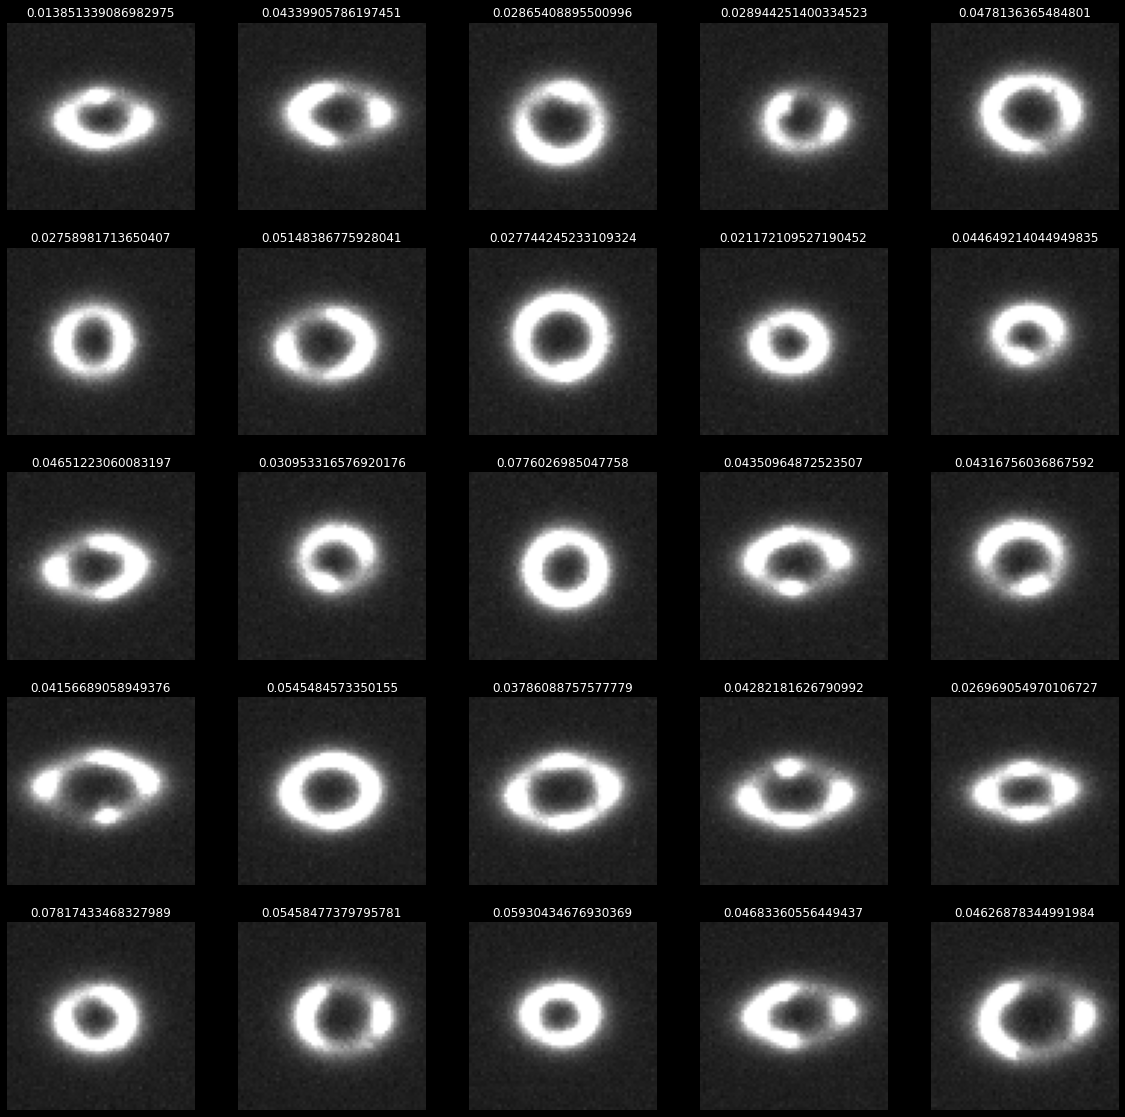

In [5]:
# 5 X 5 grid of images with title as their fraction of mass

plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X[i])
    plt.title(y[i])
    plt.axis('off')
plt.show()

In [6]:
# Split the data into training and test data with a ratio of 90:10

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

## Training and Validation

In [7]:
# Let's first go with Convolutional Neural Network

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [9]:
history = model.fit(train_X, train_y, epochs=10, validation_data=(test_X, test_y))

Epoch 1/10
563/563 [==============================] - 12s 16ms/step - loss: 3.9186e-04 - val_loss: 2.3088e-04
Epoch 2/10
563/563 [==============================] - 8s 15ms/step - loss: 2.1497e-04 - val_loss: 2.3021e-04
Epoch 3/10
563/563 [==============================] - 8s 15ms/step - loss: 2.1480e-04 - val_loss: 2.4200e-04
Epoch 4/10
563/563 [==============================] - 8s 15ms/step - loss: 2.1484e-04 - val_loss: 2.3539e-04
Epoch 5/10
563/563 [==============================] - 8s 15ms/step - loss: 2.1436e-04 - val_loss: 2.2820e-04
Epoch 6/10
563/563 [==============================] - 8s 15ms/step - loss: 2.1424e-04 - val_loss: 2.3027e-04
Epoch 7/10
563/563 [==============================] - 8s 15ms/step - loss: 2.1539e-04 - val_loss: 2.3442e-04
Epoch 8/10
563/563 [==============================] - 8s 15ms/step - loss: 2.1436e-04 - val_loss: 2.3110e-04
Epoch 9/10
563/563 [==============================] - 8s 15ms/step - loss: 2.1435e-04 - val_loss: 2.2898e-04
Epoch 10/10
563/56

In [10]:
mse = model.evaluate(test_X, test_y)

63/63 [==============================] - ETA: 0s - loss: 2.2943e-0 - 0s 5ms/step - loss: 2.2887e-04


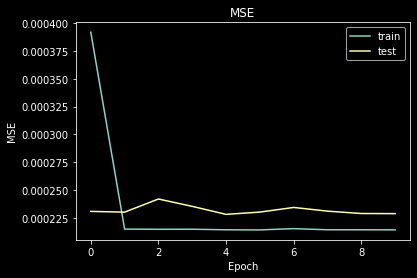

In [11]:
plt.figure()
plt.title('MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [12]:
model.save_weights('test-3-model-CNN.h5')

In [13]:
# Now let's try with a simple Neural Network

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                786496    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 790,721
Trainable params: 790,721
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(train_X, train_y, epochs=100, validation_data=(test_X, test_y))

Epoch 1/100
563/563 [==============================] - 2s 4ms/step - loss: 0.0584 - val_loss: 2.8647e-04
Epoch 2/100
563/563 [==============================] - 2s 3ms/step - loss: 2.6849e-04 - val_loss: 3.2860e-04
Epoch 3/100
563/563 [==============================] - 2s 3ms/step - loss: 2.8195e-04 - val_loss: 2.5455e-04
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 3.1978e-04 - val_loss: 3.0294e-04
Epoch 5/100
563/563 [==============================] - 2s 3ms/step - loss: 3.2314e-04 - val_loss: 4.8838e-04
Epoch 6/100
563/563 [==============================] - 2s 3ms/step - loss: 3.1588e-04 - val_loss: 2.4373e-04
Epoch 7/100
563/563 [==============================] - 2s 3ms/step - loss: 2.8308e-04 - val_loss: 2.5919e-04
Epoch 8/100
563/563 [==============================] - 2s 3ms/step - loss: 3.1456e-04 - val_loss: 4.9233e-04
Epoch 9/100
563/563 [==============================] - 2s 3ms/step - loss: 2.6235e-04 - val_loss: 2.7443e-04
Epoch 10/100
563/563 [=

In [16]:
mse = model.evaluate(test_X, test_y)

63/63 [==============================] - 0s 2ms/step - loss: 2.2870e-04


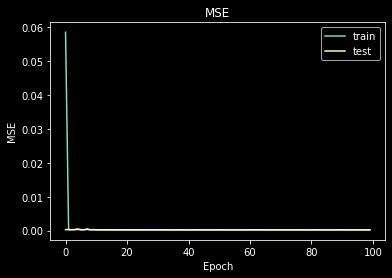

In [17]:
# Plot the MSE
plt.figure()
plt.title('MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [18]:
model.save_weights('test-3-model-DNN.h5')

## Further Processing

In [19]:
# We can see that the accuracy is not satisfiable.
# So, we can try with a more complex CNN.
# Also, we can create the direct 2-D images and train the more complex or simple CNN with them.
# We can use data augmentation.
# We can also use images with higher resolution.
# And training can be done on cloud resources.

#### Sahil Bharodiya
##### Email: sahilbharodiya.ppsv2@gmail.com
##### WhatsApp or Signal: +91 9173661451
##### LinkedIn: https://www.linkedin.com/in/sahil-bharodiya-5ab137202/